In [1]:
# La métrique euclidienne
def metric_euclid(x, y):
    sum=0
    for i in range(len(x)):
        sum += (x[i]-y[i])**2
    return math.sqrt(sum)

# La métrique #1 dans le fichier word
def metric_n1(x, y):
    sum_x=0
    sum_y=0
    for i in range(len(x)):
        sum_x += x[i]
        sum_y += y[i]
    return abs(sum_x - sum_y)

# La métrique #3 dans le fichier word
def metric_n3(x, y):
    sum=0
    for i in range(len(x)):
        if ((x[i]==0 and y[i]==0) or (x[i]!=0 and y[i]!=0)):
            sum+=1
    return 1 - sum/len(x)

In [2]:
import csv
import random
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import NearestNeighbors, kneighbors_graph,KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.graph import graph_shortest_path
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.manifold import MDS
from matplotlib.pyplot import scatter
#On ouvre le fichier 'mnist_train.csv'
data = open('mnist_train.csv')
csv_file = csv.reader(data)
data_points = []
for row in csv_file:
    data_points.append(row)
data.close()

#On enlève la première ligne, soit les "headers" de nos colonnes
data_points.pop(0)

#On transforme les données en integers
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

#Vecteur 60 000 x 1 qui contient les étiquettes
y_train = []
for row in data_points:
    y_train.append(row[0])

#Matrice 60 000 x 784 qui contient les données
x_train = []
for row in data_points:
    x_train.append(row[1:785])
    
#On ouvre le fichier 'mnist_test.csv'
data = open('mnist_test.csv')
csv_file = csv.reader(data)
data_points = []
for row in csv_file:
    data_points.append(row)
data.close()

#On enlève la première ligne, soit les "headers" de nos colones
data_points.pop(0)

#Convertir en int
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

#Vecteur 10 000 x 1 qui contient les étiquettes
y_test = []
for row in data_points:
    y_test.append(row[0])

#Matrice 10 000 x 784 qui contient les données
x_test = []
for row in data_points:
    x_test.append(row[1:785])

# PCoA

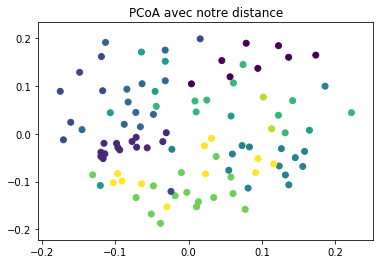

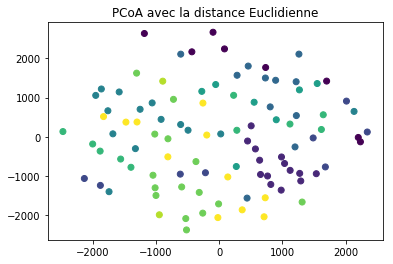

In [81]:
import numpy as np
x = x_test[0:100]
y = y_test[0:100]
m = pairwise_distances(x, metric=metric_n3)
x_reducedN3 = MDS(n_components= 2, dissimilarity ='precomputed').fit_transform(m)
x_reducedEuc = MDS(n_components= 2).fit_transform(x)

plt.figure()  
plt.title('PCoA avec notre distance')
plt.scatter(x_reducedN3[:,0],x_reducedN3[:,1] , c=y, alpha=1)
plt.figure()   

plt.title('PCoA avec la distance Euclidienne')
plt.scatter(x_reducedEuc[:,0],x_reducedEuc[:,1] , c=y, alpha=1)

<function matplotlib.pyplot.show(*args, **kw)>

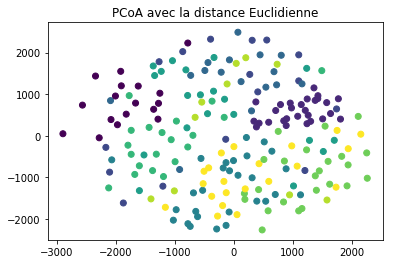

In [4]:
KPCoa=MDS(n_components=2)
X_transformede=KPCoa.fit_transform(x)

y=y_test[0:200]
fig = plt.figure()  
ax1 = fig.add_subplot(111) 
ax1.set_title('PCoA avec la distance Euclidienne')
ax1.scatter(X_transformede[:,0],X_transformede[:,1] , c=y, alpha=1)
plt.show

Text(0.5,1,'Score de classification en fonction des dimensions k')

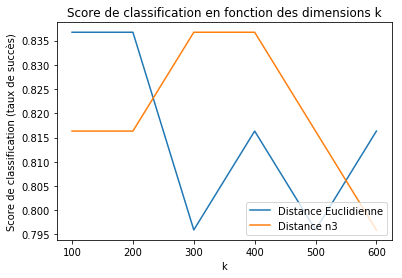

In [62]:
# Calcul de la matrice de distance des données avec notre métrique
m = pairwise_distances(x_train[:500], metric=metric_n3)

score_euc = []
score_n3  = []
dim_range = range(100,700,100)

for n in dim_range: 
    x__train = x_train[0:500].copy()
    y__train = y_train[0:500].copy()
    
    # PCoA euclidien
    mds = MDS(n_components=n)
    x__train_reduced = mds.fit_transform(x__train)
    knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=6,weights='uniform')
    knn.fit(x__train_reduced[:400], y__train[:400])
    
    score_euc.append(knn.score(x__train_reduced[451:500],y__train[451:500]))

    # PCoA avec métrique n3    
    x_train_pcoa_reduced = MDS(n_components= n, dissimilarity ='precomputed').fit_transform(m)

    knn1 = KNeighborsClassifier(n_jobs=-1,n_neighbors=6,weights='uniform')
    knn1.fit(x_train_pcoa_reduced[:400], y__train[:400])

    score_n3.append(knn1.score(x_train_pcoa_reduced[451:500],y__train[451:500]))
    
# Affichage
plt.figure()
plt.plot(dim_range, score_euc, label=('Distance Euclidienne'))
plt.plot(dim_range, score_n3, label=('Distance n3'))
plt.legend(loc='lower right')
plt.xlabel('Dimension k')
plt.ylabel('Score de classification')
plt.title('Score de classification en fonction des dimensions k')

Text(0.5,1,'Score de classification en fonction des dimensions k')

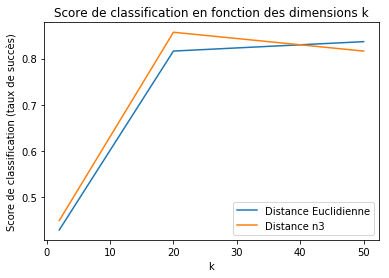

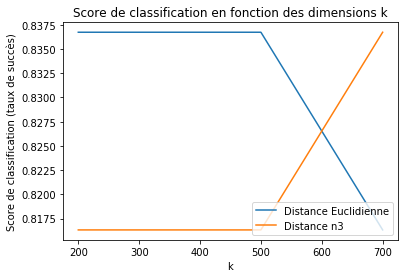

In [61]:
# Affichage
plt.figure()
plt.plot(dim_range[0:3], score_euc[0:3], label=('Distance Euclidienne'))
plt.plot(dim_range[0:3], score_n3[0:3], label=('Distance n3'))
plt.legend(loc='lower right')
plt.xlabel('k')
plt.ylabel('Score de classification (taux de succès)')
plt.title('Score de classification en fonction des dimensions k')

plt.figure()
plt.plot(dim_range[3:6], score_euc[3:6], label=('Distance Euclidienne'))
plt.plot(dim_range[3:6], score_n3[3:6], label=('Distance n3'))
plt.legend(loc='lower right')
plt.xlabel('k')
plt.ylabel('Score de classification (taux de succès)')
plt.title('Score de classification en fonction des dimensions k')

<function matplotlib.pyplot.show(*args, **kw)>

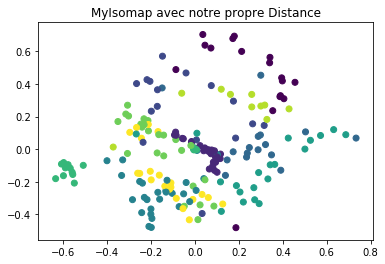

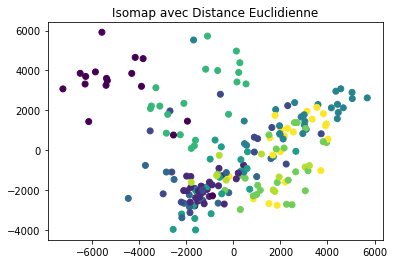

In [82]:
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.utils.graph import graph_shortest_path
from matplotlib.pyplot import scatter
from sklearn.manifold import Isomap

 #isomap avec notre distance propre x:donée k:n_neighbors n:n_components
def myIsomap(x,k,n):
    kng = kneighbors_graph(x,n_neighbors=k, mode='distance',metric=metric_n3)
    #caculer le plus court chemin
    distmatrix = graph_shortest_path(kng,directed=False,method ='D')
    isomap=MDS(n_components=n,dissimilarity='precomputed')
    #isomap avec notre distance propre
    X_transformed = isomap.fit_transform(distmatrix)
    return X_transformed
x = x_test[0:200]
X_transformed = myIsomap(x,3,2) 
y=y_test[0:200]
fig1 = plt.figure()  
ax2 = fig1.add_subplot(111) 
ax2.set_title('MyIsomap avec notre propre Distance')
ax2.scatter(X_transformed[:,0],X_transformed[:,1] , c=y, alpha=1)
plt.show

embedding = Isomap(n_components=2)
X_transformedEuc=embedding.fit_transform(x)

y=y_test[0:200]
fig = plt.figure()  
ax1 = fig.add_subplot(111) 
ax1.set_title('Isomap avec Distance Euclidienne')
ax1.scatter(X_transformedEuc[:,0],X_transformedEuc[:,1] , c=y, alpha=1)
plt.show